In [1]:
from ServiceNowData import ServiceNowHTTPXClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#client = ServiceNowHTTPXClient()
#response = client.healthCheck() # always run to make sure the instance is awake

In [3]:
# grab our major incident data
"""response = client.getData('incident','major_incident_state=accepted', {
    'sysparm_display_value':True,
    'sysparm_exclude_reference_link':True,
    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'
    })"""

#data = response.json()['result']
#df = pd.DataFrame(data)
#df.head(5)

"response = client.getData('incident','major_incident_state=accepted', {\n    'sysparm_display_value':True,\n    'sysparm_exclude_reference_link':True,\n    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'\n    })"

In [4]:
rate = 20 # average number of events per year
size = 20
# stable, shift, breakdown

z = np.random.exponential(1./rate, size=size)*365
print(f'mean: {np.mean(z)}')
print(f'max: {np.max(z)}')
print(f'min: {np.min(z)}')
print(f'std: {np.std(z)}')
df = pd.Timestamp('today').normalize() - pd.to_timedelta(24*60*60*np.cumsum(z), unit='s')
df

mean: 19.61343781427147
max: 91.02738234578953
min: 0.5698750792953056
std: 19.71917570129737


DatetimeIndex(['2023-05-11 06:40:00.638567135',
               '2023-05-02 21:11:29.416930679',
               '2023-03-19 10:52:38.568415975',
               '2023-02-13 16:04:33.428132495',
               '2023-01-23 15:28:20.342355117',
               '2022-10-24 14:48:54.507678900',
               '2022-09-25 22:29:49.416867483',
               '2022-09-13 08:02:12.356579442',
               '2022-09-10 19:04:19.345714428',
               '2022-08-30 20:55:51.448972322',
               '2022-08-24 02:29:42.293270387',
               '2022-08-01 18:49:29.615622230',
               '2022-07-09 08:03:18.686950359',
               '2022-07-08 18:22:41.480099246',
               '2022-06-22 09:55:38.591007043',
               '2022-06-09 16:08:37.964778043',
               '2022-06-03 23:36:35.859504368',
               '2022-05-09 04:47:10.636442866',
               '2022-05-02 23:38:35.491796424',
               '2022-04-25 17:32:59.456938900'],
              dtype='datetime64[ns]', f

<Axes: >

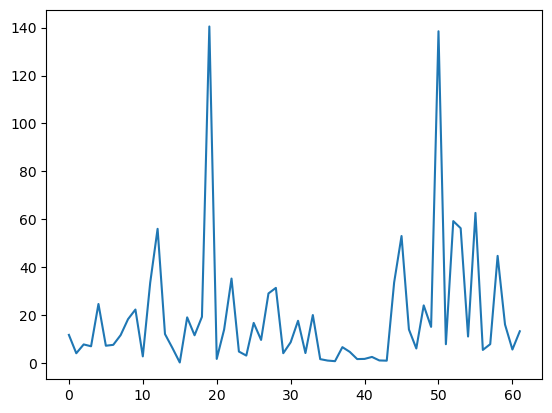

In [82]:
rates = [20,  5, 20, 80, 20]
sizes = [20,  2, 10, 10, 20]

from ServiceNowFaker import simulateArrivals
from datetime import datetime

arrivalDF = pd.DataFrame(simulateArrivals(rates, sizes))
arrivalDF = arrivalDF.rename(columns={0: "Opened"})
arrivalDF['Delta'] = -arrivalDF["Opened"].diff()
arrivalDF.loc[0,'Delta'] = datetime.today()-arrivalDF.iloc[0]['Opened'] # time difference from today

# reversing the data doesn't seem to change the chart.
display(((arrivalDF)['Delta'].astype('timedelta64[s]')/(24*60*60)).plot.line()) 

In [83]:
display(arrivalDF)

,Opened,Delta
0,2023-05-11 19:27:03.953656959,11 days 17:19:48.565214041
1,2023-05-07 18:13:49.635268522,4 days 01:13:14.318388437
2,2023-04-30 00:28:09.733044859,7 days 17:45:39.902223663
3,2023-04-23 01:07:34.772356607,6 days 23:20:34.960688252
4,2023-03-29 10:00:10.015814373,24 days 15:07:24.756542234
...,...,...
57,2020-04-08 10:32:30.826793224,7 days 20:33:02.864030867
58,2020-02-23 17:34:32.413762152,44 days 16:57:58.413031072
59,2020-02-07 16:32:07.211046070,16 days 01:02:25.202716082
60,2020-02-02 01:53:42.262182936,5 days 14:38:24.948863134
